# Subclinical Hypothyroidism and Fetal Loss

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dad_sub = pd.read_csv('DAD_OUT.csv',encoding = "ISO-8859-1", engine='python') # 28635 x 153
dad_female = dad_sub[dad_sub['SEX']=='F'][['PHN_ENC','ADMITCAT','ADMT_CAT_NM','ADMIT_DTTM','AGE_DISCH','LOS','DIS_DTTM',
                                       'DEL_SITE_NM','SEX','DXCODE1','DXCODE2','DXCODE3','DXCODE4','DXCODE5',
                                       'DXCODE6','DXCODE7', 'DXCODE8','DXCODE9','DXCODE10','DXCODE11','DXCODE12',
                                       'DXCODE13','DXCODE14','DXCODE15']]
dad_female # 17348 X 24 columns

,PHN_ENC,ADMITCAT,ADMT_CAT_NM,ADMIT_DTTM,AGE_DISCH,LOS,DIS_DTTM,DEL_SITE_NM,SEX,DXCODE1,...,DXCODE6,DXCODE7,DXCODE8,DXCODE9,DXCODE10,DXCODE11,DXCODE12,DXCODE13,DXCODE14,DXCODE15
0,291022991560,U,Urgent/Emergent,31OCT2015:20:51:00,71,1,31OCT2015:23:00:00,South Health Campus,F,F191,...,E119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,304130151057,U,Urgent/Emergent,25OCT2015:16:45:00,46,6,31OCT2015:16:25:00,Queen Elizabeth II Hospital,F,K451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,177811902619,L,Elective,21OCT2015:09:12:00,31,1,22OCT2015:19:00:00,Peter Lougheed Centre,F,O68201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,44201102153,L,Elective,29OCT2015:07:26:00,36,2,31OCT2015:17:01:00,Royal Alexandra Hospital,F,O36531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,242215672181,U,Urgent/Emergent,15DEC2015:01:52:00,50,7,22DEC2015:14:00:00,University Of Alberta Hospital,F,S72080,...,J4590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28629,182919961572,U,Urgent/Emergent,26MAY2015:11:50:00,58,372,01JUN2016:15:13:00,Claresholm Centre for Mental Health and Addict...,F,F431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28630,235627331575,U,Urgent/Emergent,20MAY2015:15:21:00,34,35,24JUN2015:16:59:00,Red Deer Regional Hospital Centre,F,F239,...,Z911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28631,71800621243,U,Urgent/Emergent,23OCT2015:01:56:00,26,1,23OCT2015:03:11:00,Royal Alexandra Hospital,F,J069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28633,95026611203,L,Elective,15DEC2015:11:08:00,25,2,17DEC2015:18:04:00,Grey Nuns Community Hospital,F,O62101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# creating a subset of the data with just the DX codes in order to search
dad_DXcode = dad_female.filter(like='DX')
mask = np.column_stack([dad_DXcode[col].str.contains(r"Z37|Z38|O10|O99|O13|O36|O36|O02|O04", na=False) for col in
                        dad_DXcode])
dad_DXcode= dad_DXcode.loc[mask.any(axis=1)]
dad_DXcode

,DXCODE1,DXCODE2,DXCODE3,DXCODE4,DXCODE5,DXCODE6,DXCODE7,DXCODE8,DXCODE9,DXCODE10,DXCODE11,DXCODE12,DXCODE13,DXCODE14,DXCODE15
2,O68201,O62301,O70101,Z37000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,O36531,O46901,Z37000,Z3580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,O68101,O42021,O70001,Z37000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,O68001,O48001,O70101,O42021,O75701,Z3580,Z37000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,O62301,O70101,Z37000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28601,O46901,Z37000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28611,O70101,O75701,Z37000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28621,O62201,O66501,O70101,Z37000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28624,O99303,F143,F142,F111,F112,F113,F141,F412,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
row_selector = dad_DXcode.index
dad_births = dad_female.filter(items=row_selector,axis=0)
dad_births # 5024 x 24

,PHN_ENC,ADMITCAT,ADMT_CAT_NM,ADMIT_DTTM,AGE_DISCH,LOS,DIS_DTTM,DEL_SITE_NM,SEX,DXCODE1,...,DXCODE6,DXCODE7,DXCODE8,DXCODE9,DXCODE10,DXCODE11,DXCODE12,DXCODE13,DXCODE14,DXCODE15
2,177811902619,L,Elective,21OCT2015:09:12:00,31,1,22OCT2015:19:00:00,Peter Lougheed Centre,F,O68201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,44201102153,L,Elective,29OCT2015:07:26:00,36,2,31OCT2015:17:01:00,Royal Alexandra Hospital,F,O36531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,100223272472,L,Elective,16DEC2015:20:15:00,29,1,17DEC2015:08:50:00,Sturgeon Community Hospital,F,O68101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,305811620017,L,Elective,17FEB2016:08:46:00,37,1,18FEB2016:10:18:00,Sturgeon Community Hospital,F,O68001,...,Z3580,Z37000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,78002402445,L,Elective,12MAY2015:06:55:00,28,1,13MAY2015:12:15:00,Foothills Medical Centre,F,O62301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28601,59615801560,L,Elective,06JUL2015:17:20:00,22,1,07JUL2015:19:30:00,St Therese-St Paul Healthcare Centre,F,O46901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28611,241106242562,L,Elective,29AUG2015:03:30:00,38,1,30AUG2015:16:30:00,Rockyview General Hospital,F,O70101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28621,262522440780,U,Urgent/Emergent,18OCT2015:02:15:00,19,1,19OCT2015:13:32:00,Westlock Healthcare Centre,F,O62201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28624,35028751741,U,Urgent/Emergent,22OCT2015:03:37:00,29,7,29OCT2015:19:15:00,Foothills Medical Centre,F,O99303,...,F113,F141,F412,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
lab = pd.read_csv('lab_out.csv') # 16,770,500x 7
lab_female =lab[lab['CLNT_GNDR']=="Female"]
lab_female # 9,448,707 x7

,PHN_ENC,CLNT_AGE,CLNT_GNDR,TEST_NM,TEST_RSLT,TEST_UOFM,TEST_VRFY_DTTM
0,224221162485,82.804910,Female,WAXY CASTS,NaN,/[LPF],12/21/2015 10:14:00
1,249825590422,41.810174,Female,Hemoglobin A1c,8.3,%,7/27/2015 09:14:00
2,224221162485,82.804925,Female,Hematocrit,0.41,L/L,12/21/2015 10:22:00
3,198507402381,25.974798,Female,RDW CV,12.9,%,12/18/2015 15:00:00
4,17325581888,53.416667,Female,EOSINOPHIL,0.10,10*9/L,6/10/2015 14:52:00
...,...,...,...,...,...,...,...
16770493,78026610000,94.577328,Female,IRON,9,umol/L,3/7/2016 18:23:00
16770494,120021632675,31.528474,Female,Ketones UA,Negative,NaN,3/16/2016 14:13:00
16770496,73610530004,57.280733,Female,MONOCYTE#,0.4,x 10*9/L,3/16/2016 10:23:00
16770497,4026343156,27.186540,Female,RED CELL DISTRIBUTION WIDTH,13.6,%,3/27/2016 09:26:00


In [6]:
phn = dad_births['PHN_ENC']
lab_births = lab_female[lab_female.PHN_ENC.isin(phn)].sort_values(by="PHN_ENC")
lab_births # 86784  x 7

,PHN_ENC,CLNT_AGE,CLNT_GNDR,TEST_NM,TEST_RSLT,TEST_UOFM,TEST_VRFY_DTTM
3865859,412641986,33.745936,Female,Prenatal Syphilis EIA,Non Reactive,NaN,8/30/2015 11:42:56
6358160,412641986,33.505143,Female,NEUT%,70,%,6/2/2015 21:55:00
6238119,412641986,33.505408,Female,Ferritin,25,ug/L,6/3/2015 00:17:00
12934417,412641986,33.505143,Female,BASO%,0,%,6/2/2015 21:55:00
2441863,412641986,33.753403,Female,Hematocrit,0.29,L/L,9/2/2015 06:23:00
...,...,...,...,...,...,...,...
936366,323126903121,19.916667,Female,RDW,13.3,%,10/28/2015 13:22:03
11396413,323126903121,19.347805,Female,MCHC,347,g/L,4/2/2015 09:12:14
16003702,323126903121,19.916667,Female,Instr Mono%,16,%,10/28/2015 13:22:03
4231935,323126903121,19.665236,Female,pH Urine UA,7.0,NaN,7/27/2015 11:13:24


In [7]:
test = lab_births.TEST_NM.unique()


np.set_printoptions(threshold=np.inf)
print(test)


['Prenatal Syphilis EIA' 'NEUT%' 'Ferritin' 'BASO%' 'Hematocrit'
 'Red Blood Count' 'RDW' 'Mean Corpuscular Volume' 'MONO' 'Interpretation'
 'MCHC' 'EOS' 'Platelet Count' 'LYMPH%' 'Hemoglobin' 'Prenatal Para'
 'Prenatal Syphilis EIA Raw' 'Reason for Rescreening' 'Glucose, GDS'
 'MONO%' 'LYMPH' 'White Blood Count' 'BASO' 'Prenatal EDD'
 'Prenatal Gravida' 'EOS%' 'Prenatal SYP EIA Numeric' 'Prenatal LMP'
 'NEUT' 'Prenatal Delivery Hospital' 'Neutrophil Auto' 'Eosinophil Auto'
 'Instr Mono%' 'Instr Neut%' 'Monocyte Auto' 'Basophil% Auto'
 'Basophil Auto' 'U RBC' 'Instr NRBC' 'Lymphocyte Auto' 'Instr Eo%'
 'Instr Lymph%' 'Lymphocyte% Auto' 'U Appear' 'Instr WBC' 'pH Urine UA'
 'U Ascorbic Acid' 'Total RLU' 'Instr Baso' 'Instr Neut' 'Instr Baso%'
 'Monocyte% Auto' 'Ketones UA' 'U Bilirubin' 'Nitrite UA' 'Instr Mono'
 'Specimen Source' 'Instr Eo' 'Neutrophil% Auto' 'U Bacteria'
 'Eosinophil% Auto' 'Instr Lymph' 'U Epithelial' 'Specific Gravity UA'
 'Blood UA' 'HCG Serum' 'Leukocyte Esterase 

Thyroid Stimulating Hormone , Weeks Gestation, Creatinine Urine Random ,'Progesterone'
'FOLLICLE STIMULATING HORMONE' 'LH' 'Progesterone' 'LUTEINIZING HORMONE 'Weight' 'Ethnic Origin' 'T3 Total'
'Creatinine Urine 24 Hour' 'Cortisol, AM'
 'TSH Raw''Testosterone, am'

In [8]:
mask2 = np.column_stack([dad_DXcode[col].str.contains(r'Z370',regex=True, na=False) for col in
                        dad_DXcode])
dad_DXcode2= dad_DXcode.loc[mask2.any(axis=1)]
test = dad_DXcode2.index

In [9]:
dad_temp = dad_female.filter(items=test,axis=0)
dad_temp['fetal_loss'] = "no"
dad_temp

,PHN_ENC,ADMITCAT,ADMT_CAT_NM,ADMIT_DTTM,AGE_DISCH,LOS,DIS_DTTM,DEL_SITE_NM,SEX,DXCODE1,...,DXCODE7,DXCODE8,DXCODE9,DXCODE10,DXCODE11,DXCODE12,DXCODE13,DXCODE14,DXCODE15,fetal_loss
2,177811902619,L,Elective,21OCT2015:09:12:00,31,1,22OCT2015:19:00:00,Peter Lougheed Centre,F,O68201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
3,44201102153,L,Elective,29OCT2015:07:26:00,36,2,31OCT2015:17:01:00,Royal Alexandra Hospital,F,O36531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
7,100223272472,L,Elective,16DEC2015:20:15:00,29,1,17DEC2015:08:50:00,Sturgeon Community Hospital,F,O68101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
17,305811620017,L,Elective,17FEB2016:08:46:00,37,1,18FEB2016:10:18:00,Sturgeon Community Hospital,F,O68001,...,Z37000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
21,78002402445,L,Elective,12MAY2015:06:55:00,28,1,13MAY2015:12:15:00,Foothills Medical Centre,F,O62301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28584,248804392394,L,Elective,24MAY2015:12:28:00,31,1,25MAY2015:14:45:00,Northern Lights Regional Health Centre,F,O70001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
28601,59615801560,L,Elective,06JUL2015:17:20:00,22,1,07JUL2015:19:30:00,St Therese-St Paul Healthcare Centre,F,O46901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
28611,241106242562,L,Elective,29AUG2015:03:30:00,38,1,30AUG2015:16:30:00,Rockyview General Hospital,F,O70101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
28621,262522440780,U,Urgent/Emergent,18OCT2015:02:15:00,19,1,19OCT2015:13:32:00,Westlock Healthcare Centre,F,O62201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [10]:
mask3 = np.column_stack([dad_DXcode[col].str.contains(r'Z371|O02|O04|013',regex=True, na=False) for col in
                        dad_DXcode])
dad_DXcode3= dad_DXcode.loc[mask3.any(axis=1)]
test2 = dad_DXcode3.index

In [11]:
dad_temp2 = dad_female.filter(items=test2,axis=0)
dad_temp2['fetal_loss'] = "yes"
dad_temp2

,PHN_ENC,ADMITCAT,ADMT_CAT_NM,ADMIT_DTTM,AGE_DISCH,LOS,DIS_DTTM,DEL_SITE_NM,SEX,DXCODE1,...,DXCODE7,DXCODE8,DXCODE9,DXCODE10,DXCODE11,DXCODE12,DXCODE13,DXCODE14,DXCODE15,fetal_loss
548,23902932120,U,Urgent/Emergent,01MAY2015:22:05:00,23,1,02MAY2015:01:31:00,Misericordia Community Hospital,F,O021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
702,158507222598,U,Urgent/Emergent,12AUG2015:07:55:00,31,1,13AUG2015:12:50:00,Royal Alexandra Hospital,F,O049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
1340,261427882068,U,Urgent/Emergent,03APR2015:01:56:00,30,1,03APR2015:05:05:00,Hinton Healthcare Centre,F,O020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
1813,59623262394,U,Urgent/Emergent,01AUG2015:18:08:00,35,2,03AUG2015:12:30:00,Northwest Health Centre,F,O021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
3701,31710212804,U,Urgent/Emergent,25MAY2015:03:17:00,40,1,26MAY2015:14:55:00,Northwest Health Centre,F,O36421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27883,107215102804,U,Urgent/Emergent,05SEP2015:18:28:00,41,1,05SEP2015:22:45:00,South Health Campus,F,O021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
27922,13409163156,U,Urgent/Emergent,04OCT2015:00:12:00,26,1,04OCT2015:12:29:00,Foothills Medical Centre,F,O021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
27995,26712032394,L,Elective,27APR2015:07:44:00,28,1,28APR2015:14:50:00,Sturgeon Community Hospital,F,O36431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
28046,121020791663,U,Urgent/Emergent,26MAR2016:20:42:00,37,1,27MAR2016:10:11:00,Grey Nuns Community Hospital,F,O021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes


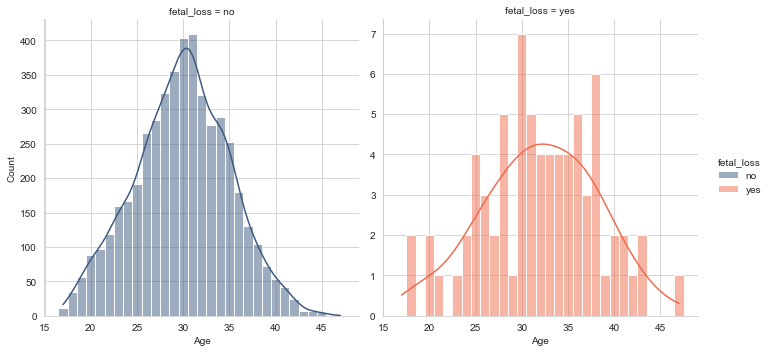

In [12]:
dad_birth_temp = pd.concat([dad_temp,dad_temp2],ignore_index=True)
sns.set_style("whitegrid")
ax = sns.displot(data=dad_birth_temp,x="AGE_DISCH",hue='fetal_loss',col='fetal_loss',kde=True,multiple='stack',
            facet_kws=dict(sharey=False),palette=['#3d5a80','#ee6c4d'],discrete=True)
ax.set_xlabels("Age")

In [13]:
phn2= dad_birth_temp['PHN_ENC']

lab_births = lab_female[lab_female.PHN_ENC.isin(phn2)].sort_values(by="PHN_ENC")
lab_births.TEST_NM.unique()

array(['MCHC', 'Hemoglobin', 'Mean Corpuscular Volume', 'Hematocrit',
       'White Blood Count', 'Prenatal Syphilis EIA', 'NEUT%',
       'Prenatal Para', 'Red Blood Count', 'Prenatal Gravida', 'RDW',
       'MONO%', 'LYMPH', 'Ferritin', 'Platelet Count',
       'Prenatal SYP EIA Numeric', 'Interpretation', 'Prenatal EDD',
       'Prenatal Delivery Hospital', 'Glucose, GDS', 'BASO', 'LYMPH%',
       'Prenatal LMP', 'Prenatal Syphilis EIA Raw', 'EOS%', 'MONO',
       'NEUT', 'BASO%', 'EOS', 'Reason for Rescreening', 'Instr Mono%',
       'Instr NRBC', 'Lymphocyte Auto', 'U RBC', 'Instr Baso',
       'Instr Neut%', 'Instr WBC', 'Eosinophil Auto', 'Instr Neut',
       'Eosinophil% Auto', 'Instr Eo%', 'Basophil Auto', 'Basophil% Auto',
       'Instr Baso%', 'Instr Lymph', 'Instr Eo', 'Blood UA', 'U Bacteria',
       'Specific Gravity UA', 'U Appear', 'Neutrophil% Auto',
       'Instr Mono', 'Monocyte% Auto', 'Ketones UA',
       'Test for Neisseria gonorrhoeae:', 'Nitrite UA',
       'Pro

In [14]:
cols = ['Thyroid Stimulating Hormone','Weeks Gestation.','Weeks Gest','Gestational age','T4 Free','T3 Free']
cols



['Thyroid Stimulating Hormone',
 'Weeks Gestation.',
 'Weeks Gest',
 'Gestational age',
 'T4 Free',
 'T3 Free']

In [15]:
births_test = lab_births[lab_births.TEST_NM.isin(cols)]
births_test= births_test.replace({'TEST_NM':{'Weeks Gestation.':'Weeks Gest','Weeks Gestation':'Weeks Gest'}})
births_test=births_test.drop(columns=['CLNT_GNDR','CLNT_AGE','TEST_VRFY_DTTM'])
births_test

,PHN_ENC,TEST_NM,TEST_RSLT,TEST_UOFM
13136996,418901242,Weeks Gest,28,week(s)
422864,418901242,Thyroid Stimulating Hormone,1.25,mIU/L
6707550,418901242,Weeks Gest,26,week(s)
14411501,423943121,T4 Free,11.0,pmol/L
5684293,423943121,T4 Free,12.5,pmol/L
...,...,...,...,...
16171110,323111190078,Weeks Gest,26,week(s)
7343828,323111190078,Thyroid Stimulating Hormone,1.80,mIU/L
11175127,323126903121,Thyroid Stimulating Hormone,1.39,mIU/L
16682572,323126903121,Weeks Gest,26,week(s)


In [16]:
data_merged = dad_birth_temp.merge(births_test,on="PHN_ENC",how='left')

cols = ['DXCODE1','DXCODE2','DXCODE3','DXCODE4','DXCODE5','DXCODE6','DXCODE7', 'DXCODE8','DXCODE9','DXCODE10',
        'DXCODE11','DXCODE12','DXCODE13','DXCODE14','DXCODE15','SEX','ADMITCAT']
data_merged = data_merged.drop(columns=cols)
# data_pivot = data_merged.pivot_table(index=['PHN_ENC','ADMT_CAT_NM','ADMIT_DTTM','AGE_DISCH','LOS','DIS_DTTM',
#                                          'DEL_SITE_NM','fetal_loss','TEST_UOFM'],columns=['TEST_NM']).reset_index()
data1 = data_merged[data_merged['TEST_NM']=='T3 Free']
data2 = data_merged[data_merged['TEST_NM']=='T4 Free']
data3 = data_merged[data_merged['TEST_NM']=='Weeks Gest']
data4 = data_merged[data_merged['TEST_NM']=='Gestational age']
data5 = data_merged[data_merged['TEST_NM']=='Thyroid Stimulating Hormone']

In [17]:
t3 = data1[['PHN_ENC','TEST_RSLT']]
t3 = t3.rename(columns={'TEST_RSLT':'T3'})

t4 = data2[['PHN_ENC','TEST_RSLT']]
t4 = t4.rename(columns={'TEST_RSLT':'T4'})

gestWeeks = data3[['PHN_ENC','TEST_RSLT']]
gestWeeks = gestWeeks.rename(columns={'TEST_RSLT':'Gest Weeks'})

tsh = data5[['PHN_ENC','TEST_RSLT']]
tsh = tsh.rename(columns={'TEST_RSLT':'TSH'})

In [18]:
data_merged1 = data_merged.merge(t3,on="PHN_ENC",how='left')
data_merged2 = data_merged1.merge(t4,on="PHN_ENC",how='left')
data_merged3 = data_merged2.merge(gestWeeks,on="PHN_ENC",how='left')
data_merged4 = data_merged3.merge(tsh,on="PHN_ENC",how='left')

dad_final = data_merged4.groupby('PHN_ENC').max().reset_index()
# fetal_loss = dad_final[dad_final['fetal_loss']=='yes']
# fetal_loss
dad_final['TSH']=dad_final.TSH.str.extract('(\d*\.?\d+)',expand=True)
dad_final['TSH']=pd.to_numeric(dad_final['TSH'],errors='coerce')
dad_final['T3']=pd.to_numeric(dad_final['T3'],errors='coerce')
dad_final['T4']=dad_final.T4.str.extract('(\d*\.?\d+)',expand=True)
dad_final['T4']=pd.to_numeric(dad_final['T4'],errors='coerce')
dad_final['Gest Weeks']=pd.to_numeric(dad_final['Gest Weeks'],errors='coerce')

C:\Users\Mark\AppData\Local\Temp/ipykernel_2084/1777090328.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  dad_final = data_merged4.groupby('PHN_ENC').max().reset_index()


In [19]:
dad_final

,PHN_ENC,ADMT_CAT_NM,ADMIT_DTTM,AGE_DISCH,LOS,DIS_DTTM,DEL_SITE_NM,fetal_loss,TEST_NM,TEST_UOFM,T3,T4,Gest Weeks,TSH
0,412641986,Elective,01SEP2015:07:49:00,33,3,04SEP2015:14:15:00,Grey Nuns Community Hospital,no,NaN,NaN,NaN,NaN,NaN,NaN
1,414422126,Elective,15MAY2015:18:55:00,26,2,17MAY2015:14:35:00,Rockyview General Hospital,no,NaN,NaN,NaN,NaN,NaN,NaN
2,418901242,Elective,18AUG2015:16:00:00,37,2,20AUG2015:12:55:00,Foothills Medical Centre,no,Weeks Gest,week(s),NaN,NaN,28.0,1.25
3,423943121,Elective,09MAR2016:14:42:00,30,1,10MAR2016:18:20:00,Peter Lougheed Centre,no,Weeks Gest,week(s),NaN,12.5,29.0,4.85
4,426591741,Elective,19AUG2015:03:50:00,34,1,20AUG2015:17:34:00,Royal Alexandra Hospital,no,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,322826941711,Elective,09MAR2016:21:24:00,29,2,11MAR2016:10:55:00,Northern Lights Regional Health Centre,no,Thyroid Stimulating Hormone,mU/L,NaN,NaN,NaN,1.35
4802,323108581602,Elective,29JAN2016:09:34:00,32,1,30JAN2016:15:20:00,Peace River Community Health Centre,no,Thyroid Stimulating Hormone,mU/L,NaN,NaN,NaN,0.51
4803,323111190078,Elective,12NOV2015:14:55:00,27,2,14NOV2015:12:50:00,Rockyview General Hospital,no,Weeks Gest,week(s),NaN,NaN,28.0,1.80
4804,323124510422,Elective,13NOV2015:21:17:00,30,2,15NOV2015:11:00:00,Chinook Regional Hospital,no,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
temp = dad_final.drop(columns=['TEST_NM','TEST_UOFM'])
fetal_loss = temp[temp.fetal_loss=='yes']
fetal_loss
no_fetal_loss = temp[temp.fetal_loss=='no']
dad_final.describe()

,PHN_ENC,AGE_DISCH,LOS,T3,T4,Gest Weeks,TSH
count,4.806000e+03,4806.000000,4806.000000,244.000000,571.000000,1200.000000,2412.000000
mean,1.660316e+11,29.919060,1.977112,4.872951,15.115166,26.679167,2.463466
std,9.070687e+10,5.133058,1.607830,2.533448,6.548984,3.588216,11.788189
min,4.126420e+08,17.000000,1.000000,1.800000,3.100000,0.000000,0.010000
25%,8.781557e+10,26.000000,1.000000,4.100000,12.400000,25.000000,1.060000
50%,1.718224e+11,30.000000,2.000000,4.500000,14.000000,26.000000,1.590000
75%,2.436168e+11,33.000000,2.000000,5.100000,16.200000,28.000000,2.392500
max,3.231269e+11,47.000000,36.000000,41.200000,100.000000,40.000000,500.000000


In [21]:
# sum(fetal_loss['TSH'].isna())
# sum(no_fetal_loss['TSH'].isna())

fetal_loss[fetal_loss.TSH.isnull()]

,PHN_ENC,ADMT_CAT_NM,ADMIT_DTTM,AGE_DISCH,LOS,DIS_DTTM,DEL_SITE_NM,fetal_loss,T3,T4,Gest Weeks,TSH
111,12115022126,Urgent/Emergent,27SEP2015:07:09:00,34,1,27SEP2015:20:09:00,Misericordia Community Hospital,yes,NaN,NaN,NaN,NaN
128,12902562623,Urgent/Emergent,07JAN2016:15:13:00,26,1,08JAN2016:23:40:00,Rockyview General Hospital,yes,NaN,NaN,NaN,NaN
131,13409163156,Urgent/Emergent,04OCT2015:00:12:00,26,1,04OCT2015:12:29:00,Foothills Medical Centre,yes,NaN,NaN,NaN,NaN
329,25111621571,Urgent/Emergent,24FEB2016:14:20:00,24,2,26FEB2016:11:36:00,Royal Alexandra Hospital,yes,NaN,NaN,NaN,NaN
411,31710212804,Urgent/Emergent,25MAY2015:03:17:00,40,1,26MAY2015:14:55:00,Northwest Health Centre,yes,NaN,NaN,NaN,NaN
439,32229971203,Urgent/Emergent,13MAR2016:11:10:00,47,1,13MAR2016:17:30:00,Misericordia Community Hospital,yes,NaN,NaN,NaN,NaN
871,59623262394,Urgent/Emergent,01AUG2015:18:08:00,35,2,03AUG2015:12:30:00,Northwest Health Centre,yes,NaN,NaN,NaN,NaN
893,61310651393,Urgent/Emergent,23NOV2015:12:49:00,32,2,25NOV2015:10:47:00,Royal Alexandra Hospital,yes,NaN,NaN,NaN,NaN
1356,100218971301,Urgent/Emergent,13MAY2015:11:19:00,33,1,14MAY2015:15:36:00,Rockyview General Hospital,yes,NaN,NaN,NaN,NaN
1510,112915600451,Urgent/Emergent,13JAN2016:10:12:00,35,1,13JAN2016:17:00:00,Peter Lougheed Centre,yes,NaN,NaN,NaN,NaN


In [127]:
temp3 = dad_final[dad_final['TSH']>=2.3]
temp3.drop(columns=['TEST_NM','TEST_UOFM'],inplace=True)
temp3[temp3['fetal_loss']=='yes']
# temp3[temp3['fetal_loss']=='yes']
# temp3[temp3['fetal_loss']=='no']

C:\Users\Mark\anaconda3\envs\data624_hw2-Ly-Mark\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,PHN_ENC,ADMT_CAT_NM,ADMIT_DTTM,AGE_DISCH,LOS,DIS_DTTM,DEL_SITE_NM,fetal_loss,T3,T4,Gest Weeks,TSH
198,17327521242,Urgent/Emergent,05JAN2016:14:22:00,33,1,06JAN2016:02:10:00,Peter Lougheed Centre,yes,NaN,NaN,NaN,4.69
545,38919852562,Urgent/Emergent,04DEC2015:18:30:00,36,2,06DEC2015:10:00:00,Rockyview General Hospital,yes,NaN,NaN,25.0,2.31
576,40225190004,Urgent/Emergent,02DEC2015:15:02:00,34,1,03DEC2015:18:20:00,Rockyview General Hospital,yes,NaN,NaN,NaN,3.22
588,41409931393,Elective,22MAR2016:09:50:00,28,1,23MAR2016:17:00:00,Rockyview General Hospital,yes,NaN,NaN,NaN,2.53
1193,87100000441,Urgent/Emergent,03DEC2015:21:52:00,38,1,04DEC2015:17:00:00,South Health Campus,yes,NaN,NaN,NaN,2.40
1325,97323860276,Elective,16NOV2015:17:27:00,37,2,18NOV2015:11:25:00,Queen Elizabeth II Hospital,yes,NaN,13.7,NaN,3.26
1439,107215102804,Urgent/Emergent,05SEP2015:18:28:00,41,1,05SEP2015:22:45:00,South Health Campus,yes,NaN,NaN,NaN,2.84
2127,156311331778,Elective,28AUG2015:07:37:00,40,1,29AUG2015:09:52:00,Red Deer Regional Hospital Centre,yes,NaN,NaN,NaN,3.05
2758,195023272512,Urgent/Emergent,16DEC2015:07:50:00,28,1,17DEC2015:19:10:00,Rockyview General Hospital,yes,NaN,NaN,NaN,5.52
3190,224232172659,Elective,16MAR2016:07:01:00,34,2,18MAR2016:11:58:00,Royal Alexandra Hospital,yes,NaN,NaN,NaN,2.44


C:\Users\Mark\AppData\Local\Temp/ipykernel_14364/4266353812.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


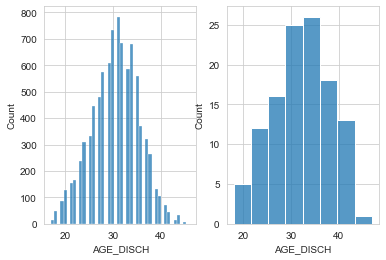

In [204]:
import seaborn as sns

fig, ax =plt.subplots(1,2)
sns.histplot(data_merged[data_merged['fetal_loss']=="no"],x='AGE_DISCH', ax=ax[0])
sns.histplot(data_merged[data_merged['fetal_loss']=="yes"],x='AGE_DISCH', ax=ax[1])
fig.show()

<AxesSubplot:>

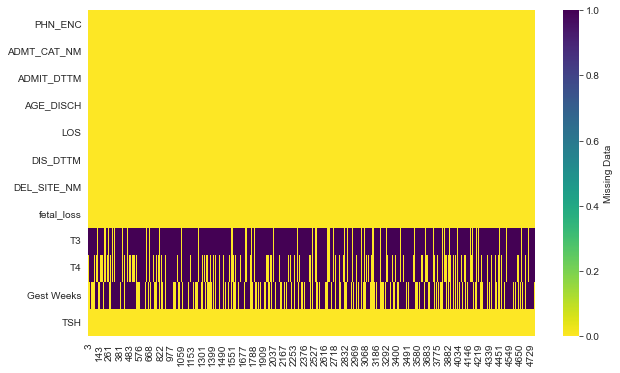

In [460]:
plt.figure(figsize=(10,6))
sns.heatmap(temp3.isna().transpose(),
            cmap="viridis_r",
            cbar_kws={'label': 'Missing Data'})

In [168]:
from pymatch.Matcher import Matcher

data = temp3.drop(columns=['PHN_ENC','ADMIT_DTTM','DIS_DTTM','Gest Weeks','DEL_SITE_NM','T3','T4','ADMT_CAT_NM'])
test = data[data.fetal_loss =="yes"]
control = data[data.fetal_loss=='no']
test['fetal_status']=1
control['fetal_status']=0

m = Matcher(test,control, yvar="fetal_status", exclude=['fetal_loss'])

Formula:
fetal_status ~ AGE_DISCH+LOS+TSH
n majority: 634
n minority: 17


C:\Users\Mark\AppData\Local\Temp/ipykernel_2084/2906055437.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['fetal_status']=1
C:\Users\Mark\AppData\Local\Temp/ipykernel_2084/2906055437.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control['fetal_status']=0


In [169]:
m.fit_scores(balance=True,nmodels=1000)

Fitting Models on Balanced Samples: 6\1000

C:\Users\Mark\anaconda3\envs\data624_hw2-Ly-Mark\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Fitting Models on Balanced Samples: 618\1000

C:\Users\Mark\anaconda3\envs\data624_hw2-Ly-Mark\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Fitting Models on Balanced Samples: 1000\1000
Average Accuracy: 76.33%


In [31]:
m.predict_scores()

C:\Users\Mark\anaconda3\envs\data624_hw2-Ly-Mark\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mark\anaconda3\envs\data624_hw2-Ly-Mark\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


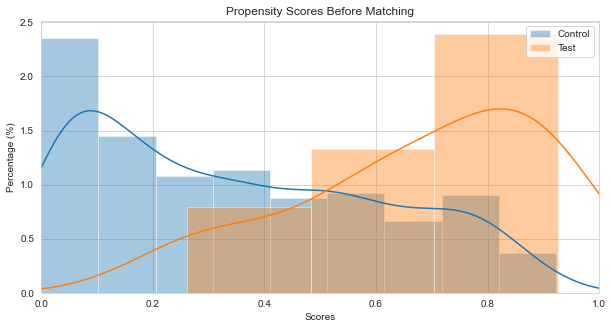

In [34]:
m.plot_scores()

In [37]:
m.match(method="min", nmatches=1, threshold=0.0001)
m.record_frequency()

,freq,n_records
0,1,34


In [46]:
m.assign_weight_vector()

KeyError: 'weight'

In [43]:
m.matched_data.sort_values("match_id").head(5)

,record_id,weight,AGE_DISCH,LOS,fetal_loss,TSH,fetal_status,scores,match_id
0,0,1.0,33,1,yes,4.69,1,0.655245,0
17,42,1.0,30,1,no,3.22,0,0.659690,0
1,1,1.0,36,2,yes,2.31,1,0.615475,1
28,348,1.0,36,2,no,2.32,0,0.614651,1
2,2,1.0,34,1,yes,3.22,1,0.791598,2


,var,ks_before,ks_after,grouped_chisqr_before,grouped_chisqr_after,std_median_diff_before,std_median_diff_after,std_mean_diff_before,std_mean_diff_after
0,AGE_DISCH,0.005,1.000,0.02,1.0,0.787371,-0.224639,0.845540,0.052856
1,LOS,0.001,0.838,1.00,1.0,-0.579485,0.000000,-0.511418,0.133333
2,TSH,0.298,0.999,1.00,1.0,-0.009169,-0.160766,-0.115732,-0.151309


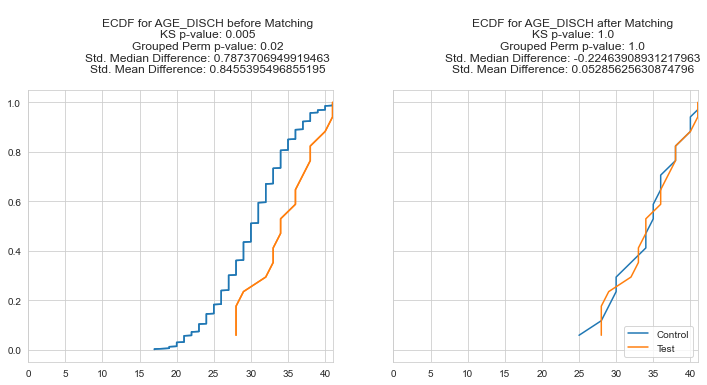

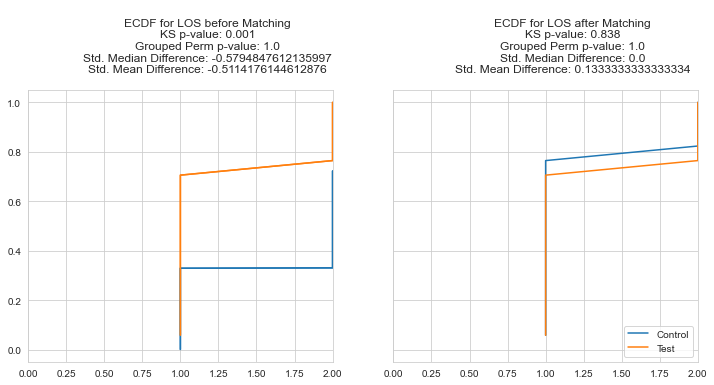

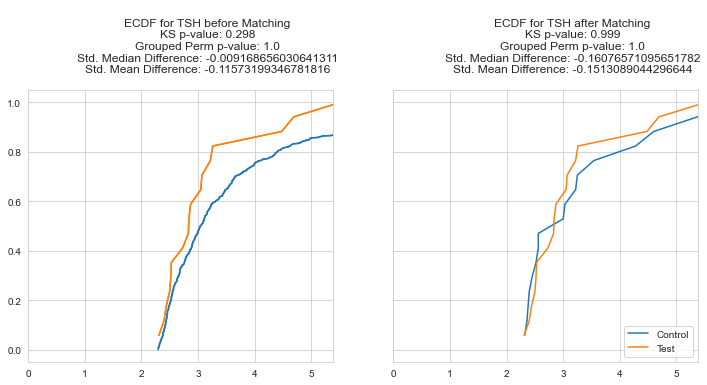

In [47]:
m.compare_continuous(return_table=True)

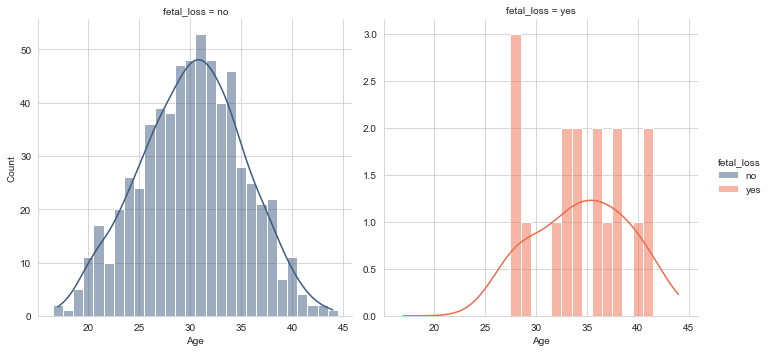

In [49]:
sns.set_style("whitegrid")
ax = sns.displot(data=temp3,x="AGE_DISCH",hue='fetal_loss',col='fetal_loss',kde=True,multiple='stack',
            facet_kws=dict(sharey=False),palette=['#3d5a80','#ee6c4d'],discrete=True)
ax.set_xlabels("Age")

In [51]:
temp3.describe()

,PHN_ENC,AGE_DISCH,LOS,T3,T4,Gest Weeks,TSH
count,6.510000e+02,651.000000,651.000000,85.000000,200.000000,257.000000,651.000000
mean,1.685920e+11,30.287250,2.153610,4.476471,14.097300,26.828794,5.652995
std,9.010871e+10,5.084106,1.726998,0.792622,3.921607,3.520291,22.375976
min,4.239431e+08,17.000000,1.000000,1.800000,3.100000,5.000000,2.300000
25%,9.501437e+10,27.000000,1.000000,4.100000,11.675000,25.000000,2.570000
50%,1.785282e+11,30.000000,2.000000,4.400000,13.700000,26.000000,3.040000
75%,2.456626e+11,34.000000,3.000000,4.800000,15.900000,28.000000,3.995000
max,3.185240e+11,44.000000,27.000000,7.400000,29.900000,40.000000,500.000000


<AxesSubplot:>

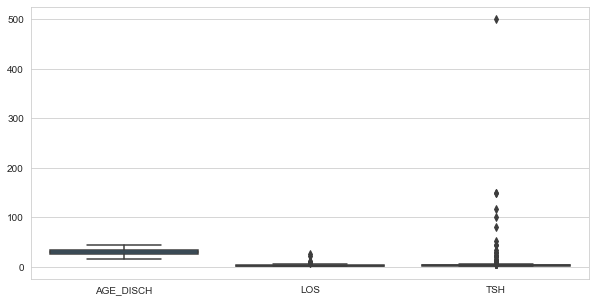

In [60]:
sns.boxplot(data=data)


In [126]:
data

,AGE_DISCH,LOS,fetal_loss,TSH
3,30,1,no,4.85
10,34,2,no,2.50
44,23,1,no,2.94
45,35,1,no,2.42
63,35,2,no,2.79
...,...,...,...,...
4725,38,2,no,2.45
4729,24,1,no,3.17
4736,33,2,no,2.46
4744,29,2,no,2.40


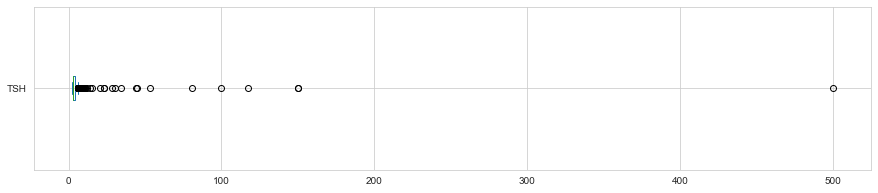


 TSH: values over 4
46 Patients
7.0661%


In [136]:
data.TSH.plot(kind='box',vert=False, figsize=(15,3))
plt.show()
print("\n TSH: values over 4")
print("{} Patients".format(len(data[data.TSH >7])))
print('{:.4f}%'.format((len(data[data.TSH > 7]) / data.shape[0])*100))

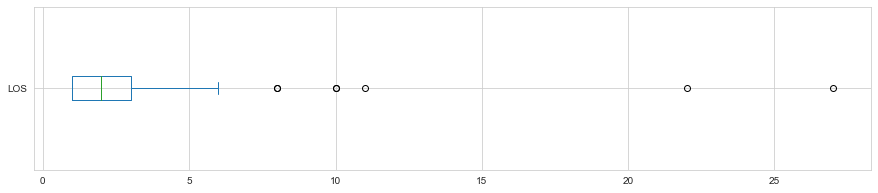


 LOS: days over 3
23 Patients
3.5330%


In [137]:
data.LOS.plot(kind='box',vert=False, figsize=(15,3))
plt.show()
print("\n LOS: days over 3")
print("{} Patients".format(len(data[data.LOS >4])))
print('{:.4f}%'.format((len(data[data.LOS > 4]) / data.shape[0])*100))

In [138]:
temp4 = temp3.copy()
temp4=temp4.drop(temp4[temp4.TSH >7].index,axis=0)
temp4=temp4.drop(temp4[temp4.LOS >4].index,axis=0)

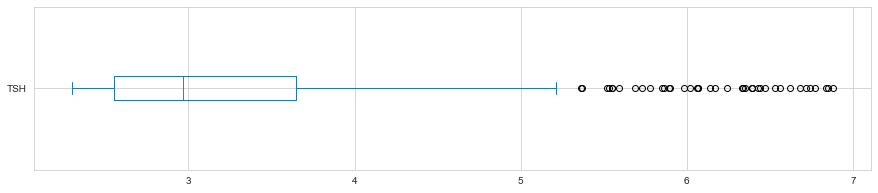

In [142]:
temp4.TSH.plot(kind='box',vert=False, figsize=(15,3))
plt.show()
# print("\n TSH: values over 4")
# print("{} Patients".format(len(temp4[temp4.TSH >4])))
# print('{:.4f}%'.format((len(temp4[temp4.TSH > 4]) / temp4.shape[0])*100))

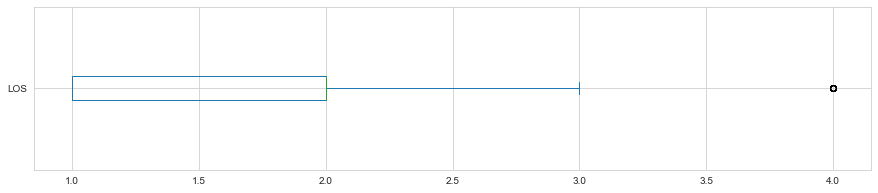

In [143]:
temp4.LOS.plot(kind='box',vert=False, figsize=(15,3))
plt.show()
# print("\n LOS: days over 3")
# print("{} Patients".format(len(data[temp4.LOS >3])))
# print('{:.4f}%'.format((len(data[temp4.LOS > 3]) / temp4.shape[0])*100))

In [141]:
temp4.fetal_loss.value_counts()

no     568
yes     17
Name: fetal_loss, dtype: int64

<AxesSubplot:>

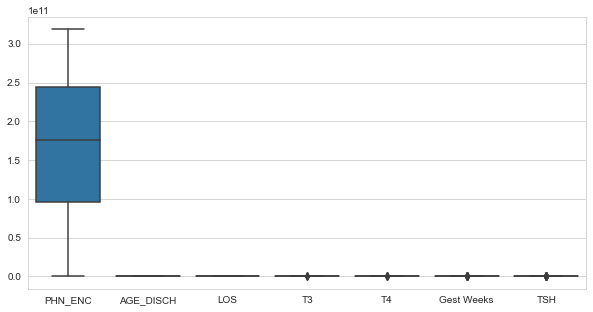

In [172]:
from pymatch.Matcher import Matcher

data = temp4.drop(columns=['PHN_ENC','ADMIT_DTTM','DIS_DTTM','Gest Weeks','DEL_SITE_NM','T3','T4','ADMT_CAT_NM'])
test = data[data.fetal_loss =="yes"]
control = data[data.fetal_loss=='no']
test['fetal_status']=1
control['fetal_status']=0

m = Matcher(test,control, yvar="fetal_status", exclude=['fetal_loss'])

Formula:
fetal_status ~ AGE_DISCH+LOS+TSH
n majority: 568
n minority: 17


C:\Users\Mark\AppData\Local\Temp/ipykernel_2084/1489671607.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['fetal_status']=1
C:\Users\Mark\AppData\Local\Temp/ipykernel_2084/1489671607.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control['fetal_status']=0


In [173]:
m.fit_scores(balance=True,nmodels=1000)
m.predict_scores()

Fitting Models on Balanced Samples: 1\1000

C:\Users\Mark\anaconda3\envs\data624_hw2-Ly-Mark\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Fitting Models on Balanced Samples: 1000\1000
Average Accuracy: 75.21%


C:\Users\Mark\anaconda3\envs\data624_hw2-Ly-Mark\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mark\anaconda3\envs\data624_hw2-Ly-Mark\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


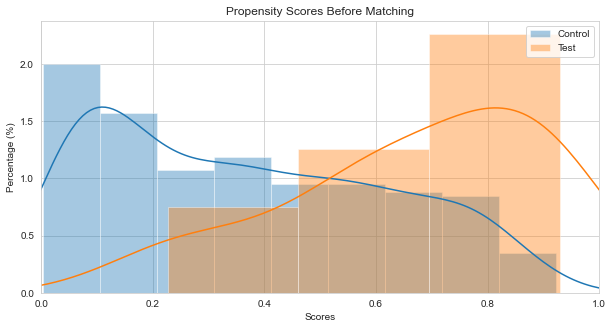

In [174]:
m.plot_scores()

In [175]:
m.match(method="min", nmatches=1, threshold=0.0001)
m.record_frequency()

,freq,n_records
0,1,34


In [176]:
m.assign_weight_vector()

In [178]:
m.matched_data.sort_values("match_id").head(5)

,record_id,weight,AGE_DISCH,LOS,fetal_loss,TSH,fetal_status,scores,match_id
0,0,1.0,33,1,yes,4.69,1,0.670578,0
30,510,1.0,30,1,no,2.31,0,0.671057,0
1,1,1.0,36,2,yes,2.31,1,0.605848,1
27,317,1.0,36,2,no,2.32,0,0.605308,1
2,2,1.0,34,1,yes,3.22,1,0.784127,2


,var,ks_before,ks_after,grouped_chisqr_before,grouped_chisqr_after,std_median_diff_before,std_median_diff_after,std_mean_diff_before,std_mean_diff_after
0,AGE_DISCH,0.002,0.982,0.027,1.0,0.793457,0.000000,0.897423,0.027724
1,LOS,0.052,1.000,1.000,1.0,-2.004294,0.000000,-0.497990,0.000000
2,TSH,0.690,0.938,1.000,1.0,-0.109213,0.235646,-0.065165,0.181586


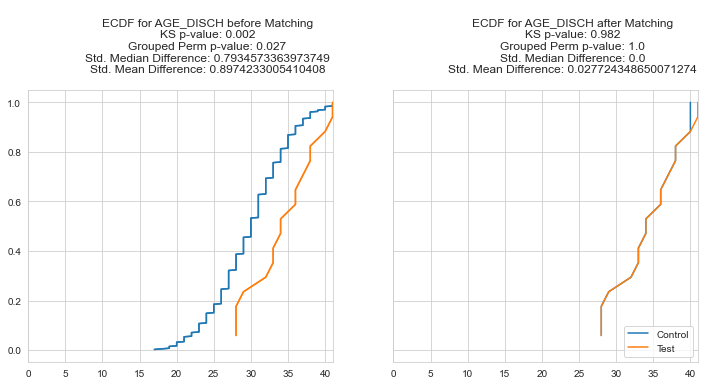

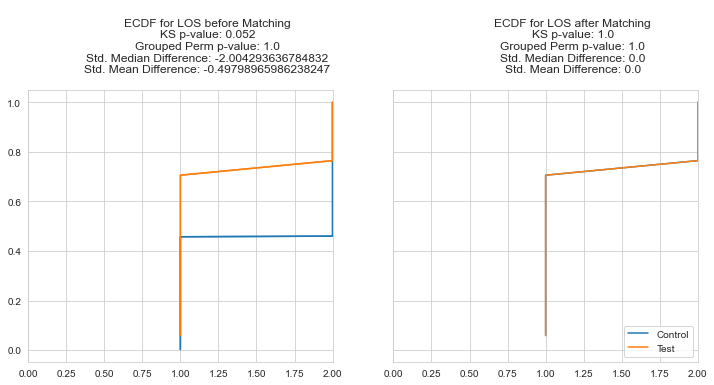

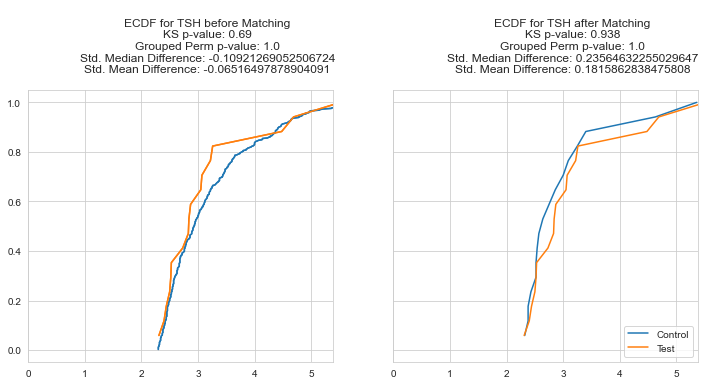

In [116]:
m.compare_continuous(return_table=True)

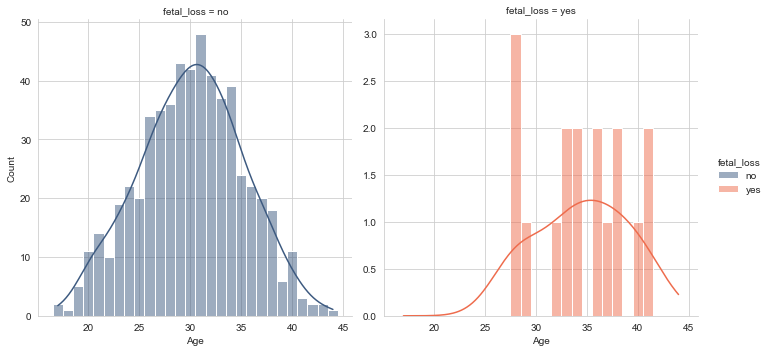

In [146]:
sns.set_style("whitegrid")
ax = sns.displot(data=temp4,x="AGE_DISCH",hue='fetal_loss',col='fetal_loss',kde=True,multiple='stack',
            facet_kws=dict(sharey=False),palette=['#3d5a80','#ee6c4d'],discrete=True)
ax.set_xlabels("Age")

In [148]:
temp4.describe()

,PHN_ENC,AGE_DISCH,LOS,T3,T4,Gest Weeks,TSH
count,5.850000e+02,585.000000,585.00000,72.000000,165.000000,236.000000,585.000000
mean,1.678247e+11,30.239316,1.94188,4.473611,14.289455,26.919492,3.323504
std,8.923285e+10,5.121553,0.86407,0.717977,3.656368,3.414282,1.042717
min,4.239431e+08,17.000000,1.00000,1.800000,3.700000,5.000000,2.300000
25%,9.561977e+10,27.000000,1.00000,4.100000,11.900000,25.000000,2.550000
50%,1.745315e+11,30.000000,2.00000,4.400000,13.700000,26.000000,2.970000
75%,2.440143e+11,34.000000,2.00000,4.800000,15.900000,28.000000,3.650000
max,3.185240e+11,44.000000,4.00000,7.400000,29.900000,40.000000,6.880000


<AxesSubplot:xlabel='TSH', ylabel='AGE_DISCH'>

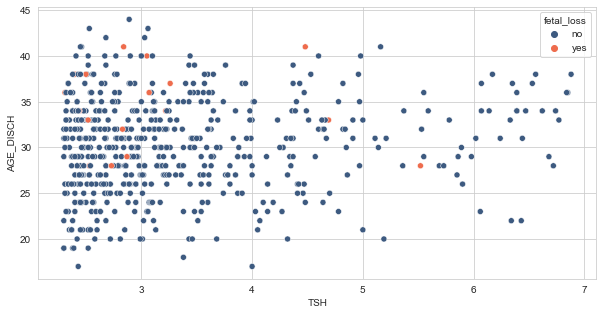

In [165]:

sns.set_style("whitegrid")
ax = sns.scatterplot(data=temp4,x="TSH",y='AGE_DISCH',hue='fetal_loss',palette=['#3d5a80','#ee6c4d'])
ax

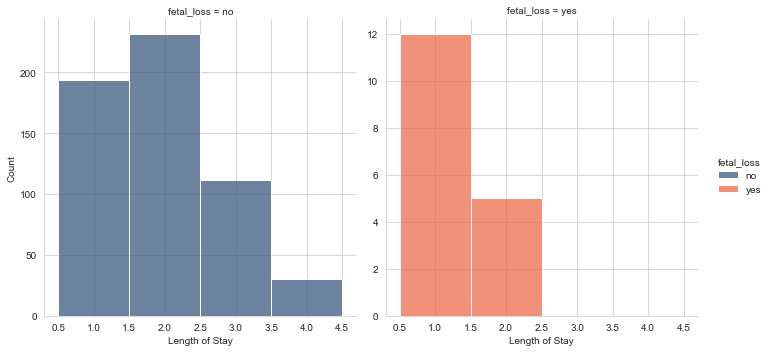

In [167]:
sns.set_style("whitegrid")
ax = sns.displot(data=temp4,x="LOS",hue='fetal_loss',col='fetal_loss',multiple='stack',
            facet_kws=dict(sharey=False),palette=['#3d5a80','#ee6c4d'],discrete=True)
ax.set_xlabels("Length of Stay")